## Library - Decision Tree

**First Approach # 1 - Single decision tree**

1. Which books you've read? List of books and also tell which book you enjoyed and which you didn't

Book - Enjoyed
a - 0
b - 1

2. Objective questions yes/no, who is author, when book was written, what genre - Attribute Selection Measures

3. Detailed / informative questions follow - Attribute Selection Measures

4. gives you the answer whether you'll like book or not

-- Problem --

Questions will be biased -- Prone to overfitting


**2nd approach - Forest**

**Create 5 different decision trees / models and combining the model output by means of majority vote - Ensemble classifier**

Find more friends - Ritesh, Suganthi, Adhimani, Sonal, Deepak...

Vote on the book - whether you'll like the book or not 

0,1,1,0,1

* majority - 1 - you'll like the book


**3rd Approach - Bootstrapped Aggregated Forest**

Problem in 2nd approach - your circle of friends is similar - same process of question

100 books - each of you randomly draw books from bag - once the ques. on a book is done we put it back in bag -

**Random Sampling with Replacement** - Bootstrapping your data - Bootstrap Sampling

1. You have multiple friends - multiple decision trees
2. Employing bootstrap sampling to assign dataset / books to each of the friend/decision tree


**4th Approach - Random Forest**

Force the friends / trees to randomly choose the questions they ask - At each node of decision tree you randomly select the attribute to split on

Questions - Attribute selection measure


It is very important to note that previously you were inducing randomness with your data by bootstrapping, now your are introducing it into your actual model.

### Visualize Decision boundary in Decision Tree

In [1]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
col=['petal_length','petal_width']
X=df.loc[:,col]
species_to_num={'setosa':0,'virginica':1,'versicolor':2}
df['tmp']=df['species'].map(species_to_num)
y=df['tmp']

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [5]:
clf=clf.fit(X,y)

In [6]:
Xv = X.values.reshape(-1,1)
h=0.02
X_min,X_max = Xv.min(),Xv.max()+1
y_min,y_max = y.min(),y.max()+1

xx,yy = np.meshgrid(np.arange(X_min,X_max,h),np.arange(y_min,y_max,h))

In [7]:
import matplotlib.pyplot as plt

In [8]:
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

In [9]:
z.shape

(150, 390)

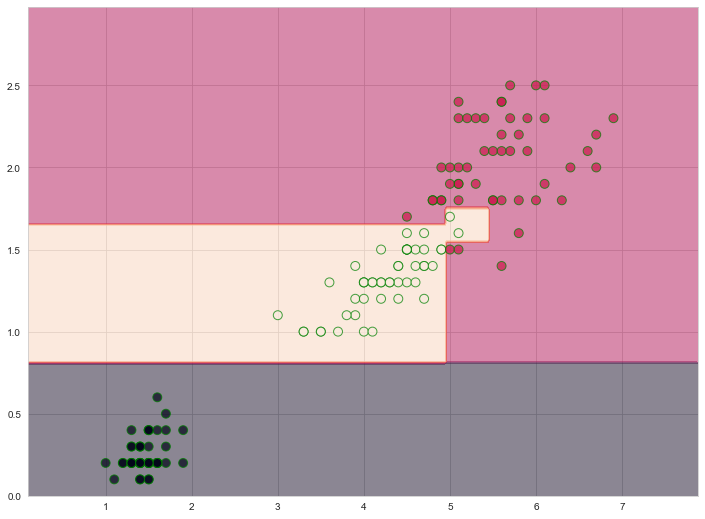

In [10]:
fig = plt.figure(figsize=(12,9))

ax = plt.contourf(xx,yy,z,alpha=0.5)
plt.scatter(X.values[:,0],X.values[:,1],c=y,s=80,alpha=0.72,edgecolors='g');

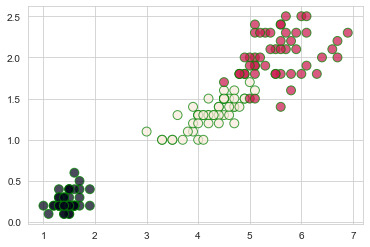

In [11]:
plt.scatter(X.values[:,0],X.values[:,1],c=y,s=80,alpha=0.72,edgecolors='g');